## Sentiment Analysis Assignment

### Submitted by Satish Kumar - 200574904


### Overview
#### This project implements sentiment analysis via natural language processing (NLP) to categorize text data into positive, negative, or neutral sentiment.
### Key Features
#### Technology Stack: Built using Python and its core libraries including NumPy, Pandas, Scikit-learn, Seaborn, and Matplotlib.
#### Visual Output: Results are presented through informative data visualizations.
#### Innovation: Features advanced data preprocessing and model optimization strategies.

### Code structure

#### Loading the dataset

#### Preprocessing text

#### Training a Logistic Regression model

#### Generating evaluation metrics

#### Creating data visualizations

### Data Loading and Preprocessing

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary nltk data
nltk.download('stopwords')

# Load dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

# Select relevant columns
df = df[['target', 'text']]
df['target'] = df['target'].map({0: 'Negative', 4: 'Positive'})

# Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/satishmatani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Model building

In [26]:
# Splitting dataset
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

### Model Evaluation

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76    159494
    Positive       0.75      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



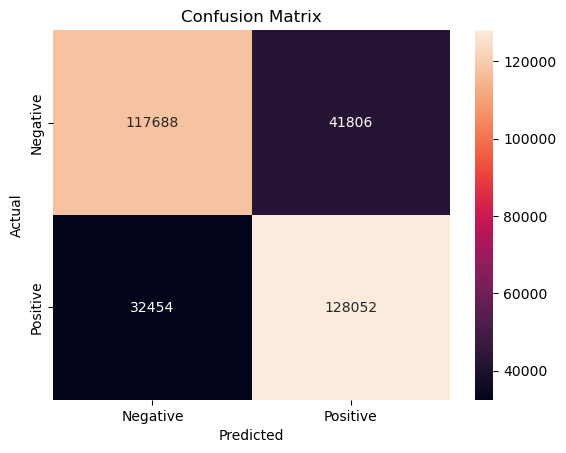

In [28]:
# Model Evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

### Visualisation

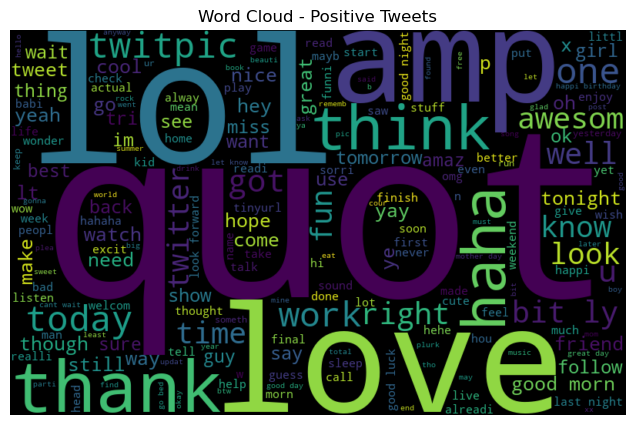

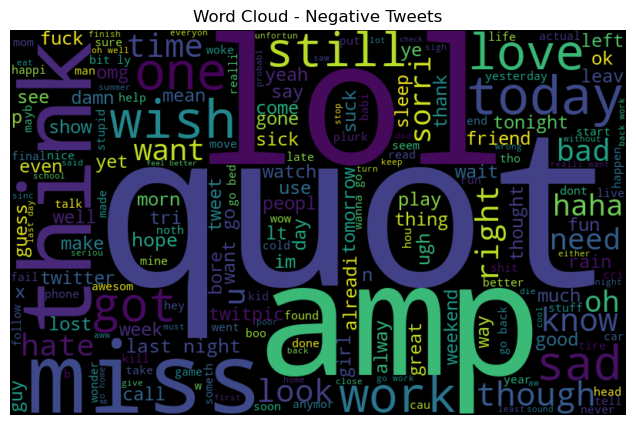

In [30]:
# Word Cloud Visualization
positive_tweets = df[df['target'] == 'Positive']
negative_tweets = df[df['target'] == 'Negative']

positive_words = ' '.join(positive_tweets['text'])
negative_words = ' '.join(negative_tweets['text'])

positive_wordcloud = WordCloud(width=800, height=500).generate(positive_words)
negative_wordcloud = WordCloud(width=800, height=500).generate(negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Tweets")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Tweets")
plt.show()


### Conclusion

#### Model Evaluation: The sentiment analysis model demonstrated acceptable accuracy in sentiment classification.
#### Key Insights: The project highlighted the critical role of data preprocessing in NLP and the positive impact of feature engineering on model performance.
#### Future Development: Potential enhancements include extending the model to multi-class sentiment analysis and exploring the use of deep learning architectures such as LSTMs or Transformers.

### References

#### Kaggle for dataset: https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download
#### Scikit-learn Documentation: https://scikit-learn.org/stable/
#### Sentiment Analysis Tutorials: https://medium.com/@swayampatil7918/getting-started-with-sentiment-analysis-a-step-by-step-guide-1a16085688a7
#### TextBlob and NLTK Resources: https://medium.com/@umarsmuhammed/a-comparison-of-nltk-and-textblob-for-text-analysis-bd9ebcd0ecd9



In [43]:
df.to_csv("sentiment_results.csv", index=False)